In [57]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [2]:
#Create a data frame
wine_df = pd.DataFrame(df)
wine_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [46]:
wine_df = wine_df.sort_values(by='price', ascending=False)
wine_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
338,Descendientes de J. Palacios,La Faraona Bierzo (Corullon),2010,4.6,28,Espana,Bierzo,3119.08,Red,4.0,3.0
196,Vega Sicilia,Unico,1965,4.6,218,Espana,Ribera del Duero,2884.04,Ribera Del Duero Red,5.0,3.0
115,Bodega Numanthia,Termanthia,2004,4.7,108,Espana,Toro,2814.16,Toro Red,5.0,3.0
343,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2011,4.6,27,Espana,Priorato,2750.00,Priorat Red,4.0,3.0
280,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2010,4.6,60,Espana,Priorato,2750.00,Priorat Red,4.0,3.0


Text(0.5, 0, 'Rating, Points')

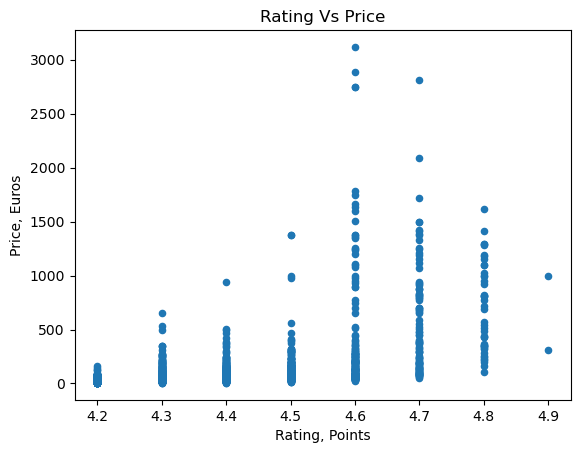

In [47]:
rating_vs_price_plot = wine_df.plot(kind='scatter', x='rating',y='price')
plt.title("Rating Vs Price")
plt.ylabel("Price, Euros")
plt.xlabel("Rating, Points")

([], [])

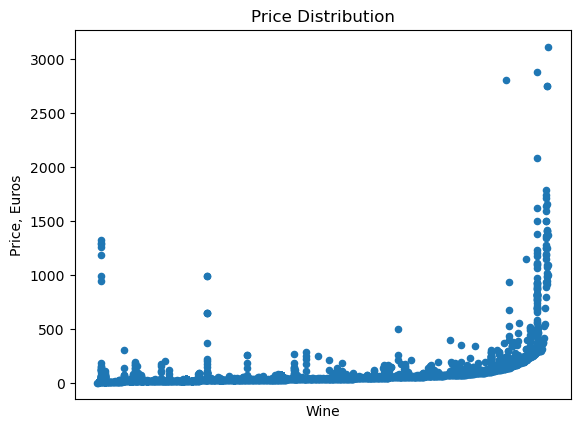

In [56]:
wine_df = wine_df.sort_values(by='price', ascending=True)
price_dist_plot = wine_df.plot(kind='scatter',x='wine',y='price')
plt.title("Price Distribution")
plt.ylabel("Price, Euros")
plt.xlabel("Wine")
plt.xticks([])

In [3]:
wine_df['winery'].value_counts()

winery
Contino                                 457
Artadi                                  261
La Rioja Alta                           254
Sierra Cantabria                        237
Matarromera                             232
                                       ... 
Briego                                    1
Guillem Carol - Cellers Carol Valles      1
Particular                                1
Bodegas Asenjo & Manso                    1
Joan Simo                                 1
Name: count, Length: 480, dtype: int64

In [4]:
wine_df['wine'].value_counts()

wine
Reserva                         467
Gran Reserva                    458
Rioja Reserva                   240
El Viejo                        224
Corimbo I                       223
                               ... 
4 Varietales Coleccion Rioja      1
Noble                             1
Primordium                        1
Finca Helena                      1
Capricho Crianza                  1
Name: count, Length: 847, dtype: int64

In [5]:
wine_df['region'].value_counts()

region
Rioja                              2440
Ribera del Duero                   1413
Priorato                            686
Toro                                300
Vino de Espana                      263
                                   ... 
Ribera del Gallego-Cinco Villas       1
Monterrei                             1
Jerez Cream                           1
Condado de Huelva                     1
Abona                                 1
Name: count, Length: 76, dtype: int64

In [6]:
wine_df['type'].value_counts()

type
Rioja Red               2357
Ribera Del Duero Red    1407
Red                      864
Priorat Red              674
Toro Red                 296
Tempranillo              291
Sherry                   274
Albarino                 252
Mencia                   235
Rioja White               92
Pedro Ximenez             35
Grenache                  35
Cava                      33
Verdejo                   27
Monastrell                18
Montsant Red              17
Syrah                     15
Chardonnay                13
Cabernet Sauvignon        11
Sparkling                  5
Sauvignon Blanc            4
Name: count, dtype: int64

In [7]:
wine_df.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [8]:
wine_df.dropna(inplace=True)

In [9]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6329 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6329 non-null   object 
 1   wine         6329 non-null   object 
 2   year         6329 non-null   object 
 3   rating       6329 non-null   float64
 4   num_reviews  6329 non-null   int64  
 5   country      6329 non-null   object 
 6   region       6329 non-null   object 
 7   price        6329 non-null   float64
 8   type         6329 non-null   object 
 9   body         6329 non-null   float64
 10  acidity      6329 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 593.3+ KB


In [10]:

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.set_output(transform="pandas")
encoder.fit(wine_df[['winery', 'wine', 'region', 'type']])
encoded_columns = encoder.transform(wine_df[['winery', 'wine', 'region', 'type']])
# encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))
# print(encoded_columns)
column_names = encoder.get_feature_names_out()
print(column_names)
encoded_df = pd.DataFrame(encoded_columns, columns=column_names)

['winery_AGE' 'winery_Aalto' 'winery_Abadal' ... 'type_Tempranillo'
 'type_Toro Red' 'type_Verdejo']


In [11]:
encoded_df.head()

,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,winery_Abel Mendoza Monge,winery_Acustic Celler,winery_Adama Wines,winery_Adega Familiar Eladio Pineiro,winery_Agusti Torello Mata,winery_Albamar,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
wine_df_encoded = pd.concat([wine_df, encoded_df], axis=1)
wine_df_encoded.drop(['winery', 'wine', 'region', 'type', 'country'], axis=1, inplace=True)
wine_df_encoded.head()

,year,rating,num_reviews,price,body,acidity,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
0,2013,4.9,58,995.00,5.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2018,4.9,31,313.50,4.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2009,4.8,1793,324.95,5.0,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1999,4.8,1705,692.96,5.0,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1996,4.8,1309,778.06,5.0,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Convert non-numeric 'year' values to NaN
wine_df_encoded['year'] = pd.to_numeric(wine_df_encoded['year'], errors='coerce')

# Drop rows with NaN values in 'year' column
wine_df_encoded = wine_df_encoded.dropna(subset=['year'])

In [14]:
scaler = StandardScaler()
scaler.fit(wine_df_encoded)

scaled_data = scaler.transform(wine_df_encoded)
scaled_df = pd.DataFrame(scaled_data, columns=wine_df_encoded.columns)
scaled_df.head()


,year,rating,num_reviews,price,body,acidity,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
0,0.006272,5.114491,-0.631490,5.604802,1.407978,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,-0.516169,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,4.717701,-0.065588
1,0.706096,5.114491,-0.676116,1.487011,-0.275715,-3.899793,-0.012836,-0.040622,-0.022237,-0.057496,...,-0.516169,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,4.661983,-0.211968,-0.065588
2,-0.553587,4.315208,2.236173,1.556195,1.407978,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,1.937351,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,-0.065588
3,-1.953235,4.315208,2.090724,3.779802,1.407978,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,1.937351,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,-0.065588
4,-2.373129,4.315208,1.436203,4.293997,1.407978,0.217748,-0.012836,-0.040622,-0.022237,-0.057496,...,1.937351,-0.738721,-0.119882,-0.022237,-0.018155,-0.028712,-0.046328,-0.214501,-0.211968,-0.065588


In [15]:
wine_df_encoded.corr()

,year,rating,num_reviews,price,body,acidity,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
year,1.000000,-0.299519,0.042120,-0.384351,-0.100687,0.155387,-0.096938,0.020723,0.012589,0.006799,...,-0.063803,-0.199310,0.043480,0.017776,-0.060871,-0.014287,0.017748,0.067575,0.137507,0.045252
rating,-0.299519,1.000000,-0.003144,0.551943,0.161058,-0.085140,0.004092,0.074640,0.001164,0.061987,...,0.168104,-0.156848,0.000335,0.024862,0.049320,0.032103,0.034708,0.011232,0.008503,0.061235
num_reviews,0.042120,-0.003144,1.000000,-0.045856,0.079627,0.050742,-0.008721,0.128458,-0.005859,0.059835,...,0.085506,0.021647,-0.019770,-0.014875,-0.011960,-0.018388,-0.008098,-0.035323,0.016511,-0.013291
price,-0.384351,0.551943,-0.045856,1.000000,0.150861,-0.030566,0.012611,0.002633,-0.006149,0.002651,...,0.148760,-0.101955,-0.012442,-0.007130,0.027208,0.001630,-0.007137,0.010452,0.017485,-0.013248
body,-0.100687,0.161058,0.079627,0.150861,1.000000,-0.001638,-0.003539,0.057195,-0.006131,-0.015853,...,0.726754,-0.203677,-0.234898,-0.043571,-0.005006,-0.104602,-0.012773,-0.059141,0.298446,-0.128514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
type_Sparkling,-0.014287,0.032103,-0.018388,0.001630,-0.104602,0.006252,-0.000369,-0.001166,-0.000638,-0.001651,...,-0.014820,-0.021210,-0.003442,-0.000638,-0.000521,1.000000,-0.001330,-0.006159,-0.006086,-0.001883
type_Syrah,0.017748,0.034708,-0.008098,-0.007137,-0.012773,0.010088,-0.000595,-0.001882,-0.001030,0.121709,...,-0.023913,-0.034223,-0.005554,-0.001030,-0.000841,-0.001330,1.000000,-0.009937,-0.009820,-0.003039
type_Tempranillo,0.067575,0.011232,-0.035323,0.010452,-0.059141,-0.836510,-0.002753,-0.008714,-0.004770,0.057762,...,-0.110719,-0.158456,-0.025715,-0.004770,-0.003894,-0.006159,-0.009937,1.000000,-0.045467,-0.014069
type_Toro Red,0.137507,0.008503,0.016511,0.017485,0.298446,0.046156,-0.002721,-0.008611,-0.004713,-0.012187,...,-0.109411,-0.156585,-0.025411,-0.004713,-0.003848,-0.006086,-0.009820,-0.045467,1.000000,-0.013903


In [16]:
y = wine_df_encoded['price']
X = wine_df_encoded.drop(columns='price')

In [24]:
from ClassificationDataPipeline import train_and_evaluate_models
df = pd.read_csv('wines_SPA.csv')
target_column = 'rating'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.9208, R² Score: 0.9208, MSE: 0.0013
KNN - Testing Score: 0.7925, R² Score: 0.7925, MSE: 0.0030
--------------------------------------------------
Random Forest - Training Score: 0.9741, R² Score: 0.9741, MSE: 0.0004
Random Forest - Testing Score: 0.8370, R² Score: 0.8370, MSE: 0.0023
--------------------------------------------------
Gradient Boosting - Training Score: 0.8595, R² Score: 0.8595, MSE: 0.0022
Gradient Boosting - Testing Score: 0.8345, R² Score: 0.8345, MSE: 0.0024
--------------------------------------------------
AdaBoost - Training Score: 0.7854, R² Score: 0.7854, MSE: 0.0034
AdaBoost - Testing Score: 0.7739, R² Score: 0.7739, MSE: 0.0032
--------------------------------------------------
SVM - Training Score: 0.4408, R² Score: 0.4408, MSE: 0.0088
SVM - Testing Score: 0.3185, R² Score: 0.3185, MSE: 0.0098
--------------------------------------------------
Linear Regression - Training Score: 0.9402, R² Score: 0.9402, MSE: 0.0009
Linear Regression 

In [25]:
from ClassificationDataPipeline import train_and_evaluate_models
df = pd.read_csv('wines_SPA.csv')
target_column = 'price'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.8770, R² Score: 0.8770, MSE: 3541.0849
KNN - Testing Score: 0.7210, R² Score: 0.7210, MSE: 5394.5639
--------------------------------------------------
Random Forest - Training Score: 0.9561, R² Score: 0.9561, MSE: 1263.3075
Random Forest - Testing Score: 0.7513, R² Score: 0.7513, MSE: 4807.5607
--------------------------------------------------
Gradient Boosting - Training Score: 0.9197, R² Score: 0.9197, MSE: 2313.2629
Gradient Boosting - Testing Score: 0.7482, R² Score: 0.7482, MSE: 4868.3742
--------------------------------------------------
AdaBoost - Training Score: -8.4810, R² Score: -8.4810, MSE: 273019.7374
AdaBoost - Testing Score: -13.1439, R² Score: -13.1439, MSE: 273441.5265
--------------------------------------------------
SVM - Training Score: 0.0865, R² Score: 0.0865, MSE: 26304.8921
SVM - Testing Score: 0.1173, R² Score: 0.1173, MSE: 17064.7195
--------------------------------------------------
Linear Regression - Training Score: 0.8752, R² Sco

In [26]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [27]:

cleaned_df = wine_df.drop(columns=['country', 'num_reviews'])
cleaned_df.head()

,winery,wine,year,rating,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [28]:
lbencoder = LabelEncoder()
labels = cleaned_df['type']
cleaned_df['type'] = lbencoder.fit_transform(labels)
cleaned_df.head()

,winery,wine,year,rating,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,Toro,995.00,19,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,Vino de Espana,313.50,18,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,Ribera del Duero,324.95,11,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,Ribera del Duero,692.96,11,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,Ribera del Duero,778.06,11,5.0,3.0


In [29]:
cleaned_df.dropna()

,winery,wine,year,rating,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,Toro,995.00,19,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,Vino de Espana,313.50,18,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,Ribera del Duero,324.95,11,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,Ribera del Duero,692.96,11,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,Ribera del Duero,778.06,11,5.0,3.0
...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,Rioja,19.98,12,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,Priorato,16.76,9,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,El Terrerazo,24.45,10,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,Ribera del Duero,64.50,11,5.0,3.0


In [30]:
from ClassificationDataPipeline import train_and_evaluate_models
df = cleaned_df
target_column = 'type'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.9847, R² Score: 0.9847, MSE: 0.1942
KNN - Testing Score: 0.9610, R² Score: 0.9610, MSE: 0.5851
--------------------------------------------------
Random Forest - Training Score: 0.9962, R² Score: 0.9962, MSE: 0.0477
Random Forest - Testing Score: 0.9861, R² Score: 0.9861, MSE: 0.2079
--------------------------------------------------
Gradient Boosting - Training Score: 0.9665, R² Score: 0.9665, MSE: 0.4235
Gradient Boosting - Testing Score: 0.9606, R² Score: 0.9606, MSE: 0.5918
--------------------------------------------------
AdaBoost - Training Score: 0.6687, R² Score: 0.6687, MSE: 4.1925
AdaBoost - Testing Score: 0.6945, R² Score: 0.6945, MSE: 4.5845
--------------------------------------------------
SVM - Training Score: 0.9026, R² Score: 0.9026, MSE: 1.2321
SVM - Testing Score: 0.9032, R² Score: 0.9032, MSE: 1.4531
--------------------------------------------------
Linear Regression - Training Score: 1.0000, R² Score: 1.0000, MSE: 0.0000
Linear Regression 

In [31]:
from ClassificationDataPipeline import train_and_evaluate_models
df = cleaned_df
target_column = 'price'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.8647, R² Score: 0.8647, MSE: 3895.3948
KNN - Testing Score: 0.6073, R² Score: 0.6073, MSE: 7592.6383
--------------------------------------------------
Random Forest - Training Score: 0.9567, R² Score: 0.9567, MSE: 1248.0681
Random Forest - Testing Score: 0.7091, R² Score: 0.7091, MSE: 5624.6503
--------------------------------------------------
Gradient Boosting - Training Score: 0.9089, R² Score: 0.9089, MSE: 2621.9116
Gradient Boosting - Testing Score: 0.7205, R² Score: 0.7205, MSE: 5403.0565
--------------------------------------------------
AdaBoost - Training Score: -11.9194, R² Score: -11.9194, MSE: 372030.6355
AdaBoost - Testing Score: -18.3776, R² Score: -18.3776, MSE: 374622.4300
--------------------------------------------------
SVM - Training Score: 0.0919, R² Score: 0.0919, MSE: 26150.9583
SVM - Testing Score: 0.1238, R² Score: 0.1238, MSE: 16939.7373
--------------------------------------------------
Linear Regression - Training Score: 0.8750, R² S

In [32]:
from ClassificationDataPipeline import train_and_evaluate_models
df = cleaned_df
target_column = 'rating'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.9221, R² Score: 0.9221, MSE: 0.0012
KNN - Testing Score: 0.8048, R² Score: 0.8048, MSE: 0.0028
--------------------------------------------------
Random Forest - Training Score: 0.9683, R² Score: 0.9683, MSE: 0.0005
Random Forest - Testing Score: 0.8167, R² Score: 0.8167, MSE: 0.0026
--------------------------------------------------
Gradient Boosting - Training Score: 0.7892, R² Score: 0.7892, MSE: 0.0033
Gradient Boosting - Testing Score: 0.7682, R² Score: 0.7682, MSE: 0.0033
--------------------------------------------------
AdaBoost - Training Score: 0.4278, R² Score: 0.4278, MSE: 0.0090
AdaBoost - Testing Score: 0.3880, R² Score: 0.3880, MSE: 0.0088
--------------------------------------------------
SVM - Training Score: 0.4462, R² Score: 0.4462, MSE: 0.0088
SVM - Testing Score: 0.3143, R² Score: 0.3143, MSE: 0.0098
--------------------------------------------------
Linear Regression - Training Score: 0.9401, R² Score: 0.9401, MSE: 0.0009
Linear Regression 

,winery,wine,rating,num_reviews,region,price,type,body,acidity
winery,1.000000,-0.201983,-0.025371,-0.002786,0.018711,0.067725,-0.088183,0.090908,0.252386
wine,-0.201983,1.000000,0.058725,0.084620,0.163771,-0.006936,0.075400,-0.022976,-0.173308
rating,-0.025371,0.058725,1.000000,-0.000165,0.047921,0.620390,0.013178,0.163033,-0.094553
num_reviews,-0.002786,0.084620,-0.000165,1.000000,0.042097,-0.036491,0.009822,0.067106,0.040138
region,0.018711,0.163771,0.047921,0.042097,1.000000,0.276573,0.386518,0.334969,-0.161361
price,0.067725,-0.006936,0.620390,-0.036491,0.276573,1.000000,0.118739,0.307770,-0.165526
type,-0.088183,0.075400,0.013178,0.009822,0.386518,0.118739,1.000000,0.396738,-0.282808
body,0.090908,-0.022976,0.163033,0.067106,0.334969,0.307770,0.396738,1.000000,-0.017950
acidity,0.252386,-0.173308,-0.094553,0.040138,-0.161361,-0.165526,-0.282808,-0.017950,1.000000


k: 1, Train/Test Score: 0.999/0.721
k: 2, Train/Test Score: 0.877/0.720
k: 3, Train/Test Score: 0.822/0.719
k: 4, Train/Test Score: 0.799/0.720
k: 5, Train/Test Score: 0.786/0.719
k: 6, Train/Test Score: 0.777/0.718
k: 7, Train/Test Score: 0.771/0.718
k: 8, Train/Test Score: 0.764/0.718
k: 9, Train/Test Score: 0.761/0.718
k: 10, Train/Test Score: 0.757/0.720


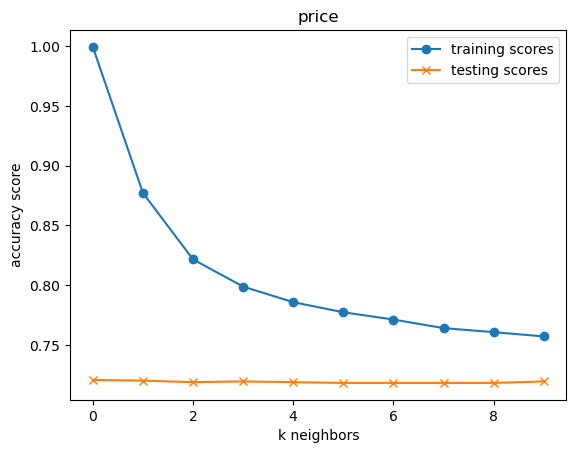

k: 1, Train/Test Score: 1.000/0.819
k: 2, Train/Test Score: 0.908/0.826
k: 3, Train/Test Score: 0.897/0.821
k: 4, Train/Test Score: 0.885/0.823
k: 5, Train/Test Score: 0.872/0.827
k: 6, Train/Test Score: 0.866/0.831
k: 7, Train/Test Score: 0.866/0.828
k: 8, Train/Test Score: 0.860/0.828
k: 9, Train/Test Score: 0.858/0.827
k: 10, Train/Test Score: 0.853/0.829


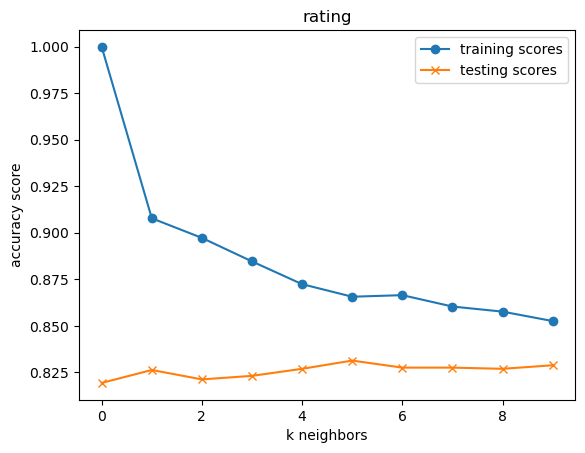

k: 1, Train/Test Score: 1.000/0.841
k: 2, Train/Test Score: 0.925/0.826
k: 3, Train/Test Score: 0.908/0.824
k: 4, Train/Test Score: 0.894/0.821
k: 5, Train/Test Score: 0.883/0.823
k: 6, Train/Test Score: 0.877/0.822
k: 7, Train/Test Score: 0.873/0.824
k: 8, Train/Test Score: 0.872/0.824
k: 9, Train/Test Score: 0.867/0.823
k: 10, Train/Test Score: 0.862/0.826


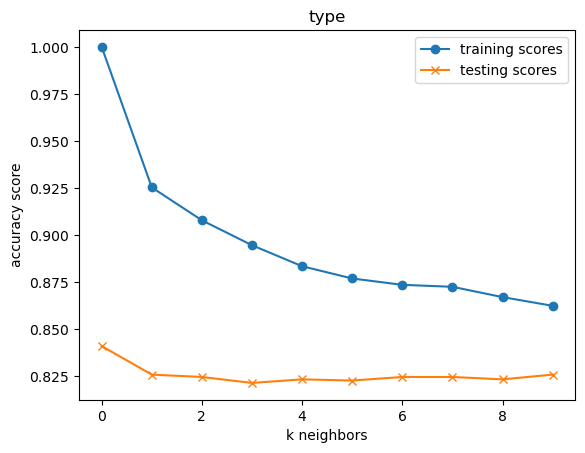

In [33]:
df=pd.read_csv('wines_SPA.csv')
df.drop(columns=['country', 'year'], inplace=True)
train_scores = []
test_scores = []
targets=['price', 'rating', 'type']
obj_columns=['winery', 'wine', 'region', 'type','price','rating']
for obj in obj_columns:
    encoder=LabelEncoder()
    label_encoded=encoder.fit_transform(df[obj])
    df[obj]=label_encoded
df_final= df.dropna()
display(df_final.corr())
for target in targets:
    y = df_final[target]
    X = df_final.drop(columns=target, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
    train_scores=[]
    test_scores=[]
    for k in range(1, 11, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test, y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    plt.plot(train_scores, marker='o', label="training scores")
    plt.plot(test_scores, marker="x", label="testing scores")
    plt.xlabel("k neighbors")
    plt.ylabel("accuracy score")
    plt.legend()
    plt.title(f'{target}')
    plt.show()

In [34]:
# from ClassificationDataPipeline import train_and_evaluate_models
# df = pd.read_csv('wine_df2.csv')
# df.head()

In [35]:
# df.drop(columns=['description','region_2','taster_name','taster_twitter_handle','Unnamed: 0'], inplace=True)

In [36]:
# target_column = 'points'
# Randomstate = 50
# accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
# print(accuracy_scores)

In [37]:
# target_column = 'title'
# Randomstate = 50
# accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
# print(accuracy_scores)

In [38]:
# target_column = 'price'
# Randomstate = 50
# accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
# print(accuracy_scores)

In [39]:
#MinMaxScaler 
df = cleaned_df
target_column = 'price'
Randomstate = 50
accuracy_scores = train_and_evaluate_models(df, target_column, Randomstate)
print(accuracy_scores)

KNN - Training Score: 0.8647, R² Score: 0.8647, MSE: 3895.3948
KNN - Testing Score: 0.6073, R² Score: 0.6073, MSE: 7592.6383
--------------------------------------------------
Random Forest - Training Score: 0.9581, R² Score: 0.9581, MSE: 1207.7687
Random Forest - Testing Score: 0.7154, R² Score: 0.7154, MSE: 5502.2471
--------------------------------------------------
Gradient Boosting - Training Score: 0.9089, R² Score: 0.9089, MSE: 2621.9116
Gradient Boosting - Testing Score: 0.7168, R² Score: 0.7168, MSE: 5475.3380
--------------------------------------------------
AdaBoost - Training Score: -12.3491, R² Score: -12.3491, MSE: 384405.4781
AdaBoost - Testing Score: -18.9910, R² Score: -18.9910, MSE: 386482.6307
--------------------------------------------------
SVM - Training Score: 0.0919, R² Score: 0.0919, MSE: 26150.9583
SVM - Testing Score: 0.1238, R² Score: 0.1238, MSE: 16939.7373
--------------------------------------------------
Linear Regression - Training Score: 0.8750, R² S

In [80]:
model = LinearRegression()
y = scaled_df['price']
X = scaled_df.drop(columns='price')


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

model.fit(X_train,y_train)
predicted_prices = model.predict(X_test)

Text(0, 0.5, 'price')

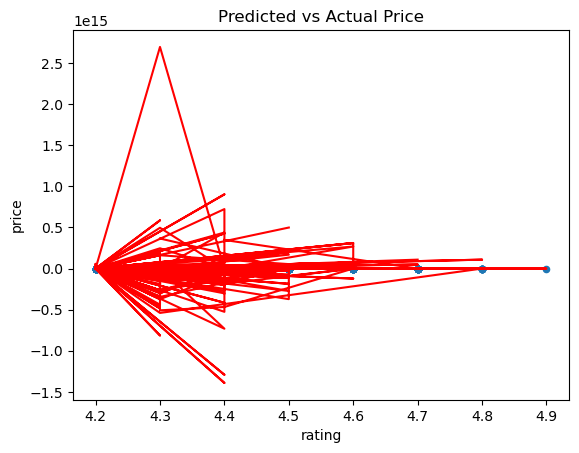

In [94]:
# Create a DataFrame for the test data with actual and predicted prices
wine_df_test = pd.DataFrame(X_test)
wine_df_test['actual_price'] = y
wine_df_test['rating'] = wine_df['rating']
wine_df_test['predicted_price'] = predicted_prices

# Scatter plot for actual prices
price_plot = wine_df_test.plot.scatter(
    y= 'actual_price',
    x='rating',
    title='Predicted vs Actual Price'
)

# Plot the best fit line for predicted prices
wine_df_test.plot.line(
    y='predicted_price',
    x='rating',
    color='red',
    ax=price_plot,
    legend=False
)

price_plot.set_xlabel('rating')
price_plot.set_ylabel('price')